# Preliminary Steps

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Data
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [3]:
# Defining function to describe feature distributions:
def desc_distr(col):
# Defining variables
    features=df[col]
    mean=features.mean()
    median=features.median()
    std=features.std()
    plus_one_std=mean+std
    minus_one_std=mean-std
    kurt=stats.kurtosis(features, fisher=False)
    fig, ax=plt.subplots(figsize=[10,6])
    sns.histplot(features, stat='probability', kde=True)
    ax.axvline(mean, color='red', label=f'Mean = {mean:,.2f}')
    ax.axvline(median, color ='green', label=f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color='black', label=f'+1 std = {plus_one_std:,.2}')
    ax.axvline(minus_one_std, color='black', label=f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color='yellow', zorder=0)
    ax.set_title(f'{col.title().replace("_"," ")}')
    ax.legend();
    print(f'Kurtosis: {kurt}')

# Vitamin D Levels:

Kurtosis: 3.013147515833447


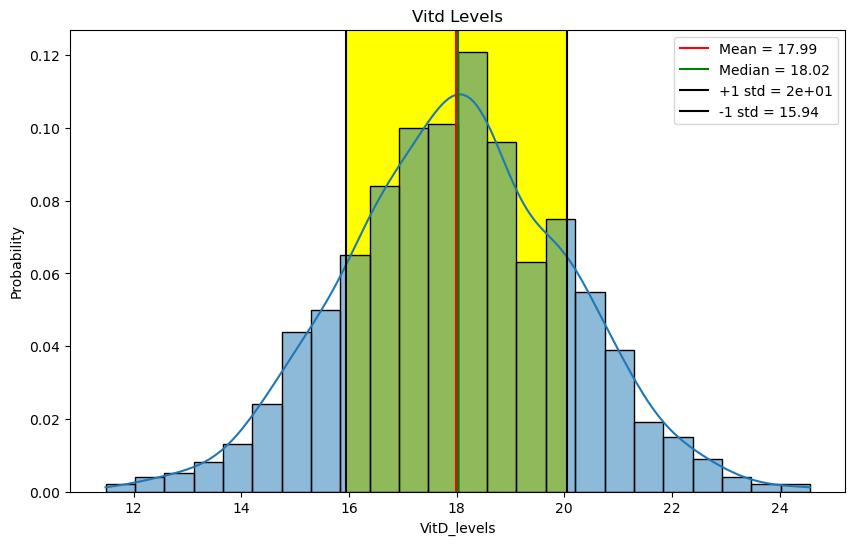

In [4]:
desc_distr('VitD_levels')

1. This feature is continuous.
2. It is not skewed.
3. It displays a mesokurtic distribution.

# Doctor Visits

Kurtosis: 2.9919958083381206


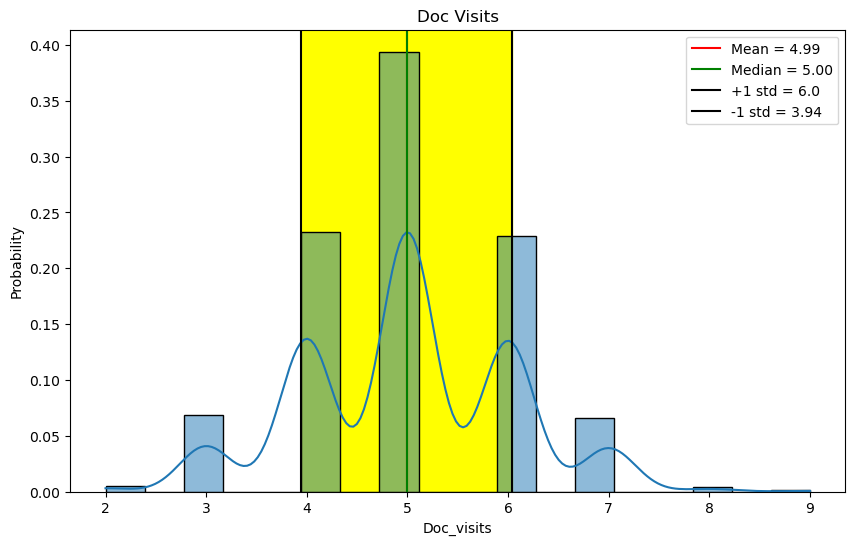

In [5]:
desc_distr('Doc_visits')

1. This feature is discrete.
2. It is not skewed.
3. It displays a platykurtic distribution.

# Total Charges

Kurtosis: 3.2650077463439384


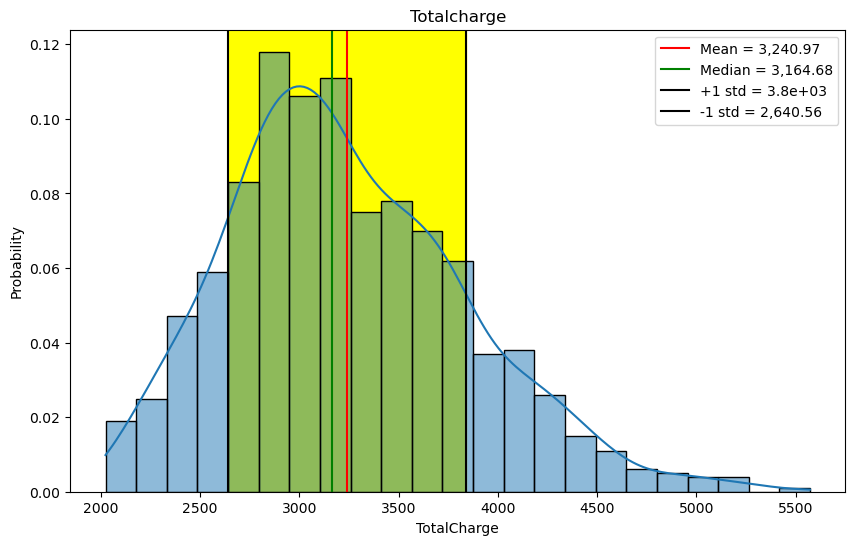

In [6]:
desc_distr('TotalCharge')

1. This features is continuous.
2. It is positively skewed.
3. It displays a leptokurtic distribution.